In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# import tensorflow.keras as keras
# from tensorflow.keras import layers
import torch
import torch.nn as nn
from scipy import stats

In [2]:
sb.set_theme()

# Prepare datasets

In [3]:
df_x = pd.read_csv('../data/dataset_02/data.csv')
df_y = pd.read_csv('../data/dataset_02/answer.csv')

In [4]:
df_x = df_x.drop(labels=['Unnamed: 0'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_y = df_y.drop(labels=['Unnamed: 0'], axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...
48801,-9.63243,9.66777,6.225,-0.19256,0.23003,-14.997
48802,-0.19256,0.23003,-14.997,13.42070,6.56526,1.335
48803,13.42070,6.56526,1.335,-0.19256,0.23003,-14.997
48804,-0.19256,0.23003,-14.997,-13.56919,5.13653,3.807


In [6]:
df = pd.concat([df_x, df_y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-9.63243,9.66777,6.225,-0.19256,0.23003,-14.997
48802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,13.42070,6.56526,1.335
48803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.42070,6.56526,1.335,-0.19256,0.23003,-14.997
48804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,-13.56919,5.13653,3.807


In [7]:
labels = [str(i) for i in range(672)]

In [8]:
df = df.drop_duplicates(subset=labels, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.19873,1.87854,9.801,-0.19256,0.23003,-14.997
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,-0.19256,0.23003,-14.997,8.72039,6.20611,10.509
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.72039,6.20611,10.509,-0.19256,0.23003,-14.997
19962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,2.34033,14.49242,3.081


In [9]:
df_x = df.drop(labels=['x1', 'y1', 'z1', 'x2', 'y2', 'z2'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
df_y = df.drop(labels=labels, axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...
19959,11.19873,1.87854,9.801,-0.19256,0.23003,-14.997
19960,-0.19256,0.23003,-14.997,8.72039,6.20611,10.509
19961,8.72039,6.20611,10.509,-0.19256,0.23003,-14.997
19962,-0.19256,0.23003,-14.997,2.34033,14.49242,3.081


In [11]:
df_x = np.reshape(df_x.to_numpy(), (-1, 24, 28, 1))
df_x.shape

(19964, 24, 28, 1)

In [12]:
df_y = df_y.to_numpy()
df_y

array([[  0.10871,  -0.2796 ,  14.997  ,  10.61088,  10.45806,  -1.743  ],
       [ 10.61088,  10.45806,  -1.743  ,   0.10871,  -0.2796 ,  14.997  ],
       [  0.10871,  -0.2796 ,  14.997  ,  11.8341 ,   1.03286,  -9.159  ],
       ...,
       [  8.72039,   6.20611,  10.509  ,  -0.19256,   0.23003, -14.997  ],
       [ -0.19256,   0.23003, -14.997  ,   2.34033,  14.49242,   3.081  ],
       [  2.34033,  14.49242,   3.081  ,  -0.19256,   0.23003, -14.997  ]])

In [13]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.9)

train_x, valid_x, train_y, valid_y = train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.33)

In [14]:
print(train_x.shape), print(train_y.shape)
print(valid_x.shape), print(valid_y.shape)
print(test_x.shape), print(test_y.shape)

(12037, 24, 28, 1)
(12037, 6)
(5930, 24, 28, 1)
(5930, 6)
(1997, 24, 28, 1)
(1997, 6)


(None, None)

# TensorFlow

In [28]:
model_tf = keras.Sequential([
    keras.Input(shape=(24, 28, 1)),
    layers.Conv2D(32, (7, 7), activation="relu", data_format='channels_last'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(64, (3, 3), activation="relu", data_format='channels_last'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='linear')
])

2023-05-30 16:09:39.570744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-30 16:09:39.733899: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [29]:
model_tf.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanSquaredError()])

In [30]:
model_tf.load_weights("../logs/weights_model_02/Weights-026--22.49820.hdf5")

# Prepare data for Torch

In [15]:
df_x = np.reshape(df_x, (-1, 1, 24, 28))
df_x.shape

(19964, 1, 24, 28)

In [16]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.9)

train_x, valid_x, train_y, valid_y = train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.33)

In [17]:
print(train_x.shape), print(train_y.shape)
print(valid_x.shape), print(valid_y.shape)
print(test_x.shape), print(test_y.shape)

(12037, 1, 24, 28)
(12037, 6)
(5930, 1, 24, 28)
(5930, 6)
(1997, 1, 24, 28)
(1997, 6)


(None, None)

In [18]:
train_x_t = torch.tensor(train_x).float()
train_y_t = torch.tensor(train_y).float()
valid_x_t = torch.tensor(valid_x).float()
valid_y_t = torch.tensor(valid_y).float()
test_x_t = torch.tensor(test_x).float()
test_y_t = torch.tensor(test_y).float()

# Torch

In [19]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = nn.Conv2d(1, 32, 7)
        self.max_pool_1 = nn.MaxPool2d(2, stride=2)
        self.conv_2 = nn.Conv2d(32, 64, 3)
        self.max_pool_2 = nn.MaxPool2d(2, stride=2)
        self.hidden_1 = nn.Linear(768, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.hidden_3 = nn.Linear(64, 64)
        self.hidden_4 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 6)

    def forward(self, x):
        x = torch.relu(self.conv_1(x))
        x = self.max_pool_1(x)
        x = torch.relu(self.conv_2(x))
        x = self.max_pool_2(x)
        x = torch.reshape(x, (x.shape[0], 768))
        x = torch.relu(self.hidden_1(x))
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_3(x))
        x = torch.relu(self.hidden_4(x))
        output = self.output(x)
        return output

In [20]:
loss_function = nn.MSELoss()

# Analysis

In [44]:
out = model_tf.evaluate(test_x, test_y, batch_size=64)
out = np.array(out)
out[0]

2023-05-30 16:17:04.954997: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops_fused_impl.h:760 : INVALID_ARGUMENT: Computed output size would be negative: -5 [input_size: 1, effective_filter_size: 7, stride: 1]
2023-05-30 16:17:04.955047: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Computed output size would be negative: -5 [input_size: 1, effective_filter_size: 7, stride: 1]
	 [[{{node sequential/conv2d/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "/home/mawerid/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/mawerid/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/mawerid/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/mawerid/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/mawerid/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_31233/2559898510.py", line 1, in <module>
      out = model_tf.evaluate(test_x, test_y, batch_size=64)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1788, in test_step
      y_pred = self(x, training=False)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
Computed output size would be negative: -5 [input_size: 1, effective_filter_size: 7, stride: 1]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_test_function_1738]

In [21]:
model = Model()
model.load_state_dict(torch.load("../logs/weights_model_03/model_state_adam_02.pt"))

<All keys matched successfully>

In [22]:
model.eval()

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (max_pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_1): Linear(in_features=768, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3): Linear(in_features=64, out_features=64, bias=True)
  (hidden_4): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=6, bias=True)
)

In [23]:
valid_loss = 0.0
batch_size = 64
for i in range(0, valid_x_t.size()[0], batch_size):
        data = valid_x_t[i:i + batch_size]
        target = valid_y_t[i:i + batch_size]

        prediction = model(data)
        loss = loss_function(prediction, target)
        valid_loss += loss.item()
valid_loss / len(valid_y_t)

0.3206219338647029

In [24]:
test_loss = 0.0
batch_size = 64
for i in range(0, test_x_t.size()[0], batch_size):
        data = test_x_t[i:i + batch_size]
        target = test_y_t[i:i + batch_size]

        prediction = model(data)
        loss = loss_function(prediction, target)
        test_loss += loss.item()
test_loss / len(test_y_t)

0.30847084492400223

In [25]:
prediction = model(test_x_t)

In [26]:
prediction = prediction.detach().numpy()

In [27]:
truth = test_y_t.detach().numpy()

In [54]:
delta = []
for pred, tr in zip(prediction, truth):
    abs_pred = np.array([pred[3] - pred[0], pred[4] - pred[1], pred[5] - pred[1]])
    abs_tr = np.array([tr[3] - tr[0], tr[4] - tr[1], tr[5] - tr[1]])
    pred_norm = np.sqrt(np.sum(np.square(abs_pred)))
    tr_norm = np.sqrt(np.sum(np.square(abs_tr)))
    cos = np.sum(abs_pred * abs_tr) / (pred_norm * tr_norm)
    delta.append(cos)

In [55]:
delta = np.arccos(np.array(delta))
delta

array([0.0801926 , 0.19668701, 0.07728656, ..., 0.14121623, 2.943648  ,
       0.545627  ], dtype=float32)

In [30]:
# for i in range(len(delta)):
#     if delta[i] >= 0:
#         delta[i] = np.arccos(delta[i])
#     else:
#         delta[i] = -np.arccos(delta[i])

In [31]:
pd.DataFrame(delta).describe()

,0
count,1997.000000
mean,0.426872
std,0.496417
min,0.006030
25%,0.120783
50%,0.242632
75%,0.514992
max,3.127692


In [56]:
for i in range(len(delta)):
    if delta[i] > np.pi:
        delta[i] %= np.pi
    elif delta[i] < -np.pi:
        delta[i] %= np.pi
    elif delta[i] > np.pi/2:
        delta[i] -= np.pi/2
    elif delta[i] < -np.pi/2:
        delta[i] += np.pi/2

In [57]:
delta.shape

(1997,)

In [58]:
delta = delta.reshape((1997, 1))
delta

array([[0.0801926 ],
       [0.19668701],
       [0.07728656],
       ...,
       [0.14121623],
       [1.3728517 ],
       [0.545627  ]], dtype=float32)

In [35]:
pd.DataFrame(delta).describe()

,0
count,1997.000000
mean,0.353720
std,0.333593
min,0.006030
25%,0.117926
50%,0.232330
75%,0.474325
max,1.563733


In [36]:
tmp = []
for tr in truth:
    t = np.array([tr[3] - tr[0], tr[4] - tr[1], tr[5] - tr[1]])
    t = t / np.sqrt(np.sum(np.square(t)))
    tmp.append(np.array([np.arccos(t[2]), np.arctan(t[1]/t[0]) + np.pi/2]))
tmp = np.array(tmp)
tmp

array([[1.8969959 , 1.49952827],
       [2.14344978, 1.5160283 ],
       [1.21446443, 0.11649187],
       ...,
       [2.46439028, 2.29133238],
       [0.97161251, 1.59981868],
       [1.83091938, 1.77399519]])

In [37]:
al = np.concatenate((tmp, delta), axis=1)
al

array([[1.8969959 , 1.49952827, 0.0801926 ],
       [2.14344978, 1.5160283 , 0.19668701],
       [1.21446443, 0.11649187, 0.07728656],
       ...,
       [2.46439028, 2.29133238, 0.14121623],
       [0.97161251, 1.59981868, 1.37285173],
       [1.83091938, 1.77399519, 0.545627  ]])

In [38]:
al = pd.DataFrame(al, columns=["theta", "phi", "Относительное смещение, радианы"])

In [39]:
al.describe()

,theta,phi,"Относительное смещение, радианы"
count,1997.000000,1997.000000,1997.000000
mean,1.637610,1.695594,0.353720
std,0.579699,0.871051,0.333593
min,0.163486,0.001851,0.006030
25%,1.187589,1.057007,0.117926
50%,1.569822,1.765229,0.232330
75%,2.170382,2.417109,0.474325
max,3.117156,3.140807,1.563733


In [40]:
t_1 = al[(al["theta"] >= 0.0) & (al["theta"] < np.pi/3)]["Относительное смещение, радианы"]
t_2 = al[(al["theta"] >= np.pi/3) & (al["theta"] < 2*np.pi/3)]["Относительное смещение, радианы"]
t_3 = al[(al["theta"] >= 2*np.pi/3) & (al["theta"] < np.pi)]["Относительное смещение, радианы"]
p_1 = al[(al["phi"] >= 0.0) & (al["phi"] < np.pi/3)]["Относительное смещение, радианы"]
p_2 = al[(al["phi"] >= np.pi/3) & (al["phi"] < 2*np.pi/3)]["Относительное смещение, радианы"]
p_3 = al[(al["phi"] >= 2*np.pi/3) & (al["phi"] < np.pi)]["Относительное смещение, радианы"]

Text(17.31944444444445, 0.5, 'Плотность распределения')

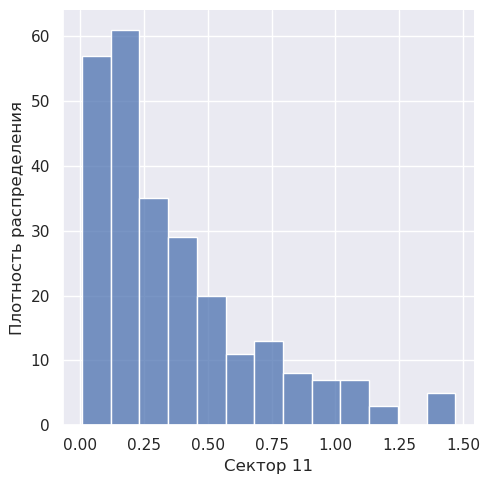

In [41]:
sb.displot(x=pd.DataFrame(set(t_2) & set(p_1), columns=["Сектор 11"])["Сектор 11"], kind="hist")
plt.ylabel("Плотность распределения")

In [42]:
pd.DataFrame(set(t_1) & set(p_1))

,0
0,0.700209
1,1.072579
2,0.074744
3,1.149523
4,0.016128
...,...
82,0.941253
83,0.577127
84,0.245140
85,0.568363


array([[<Axes: title={'center': 'Сектор 11'}>,
        <Axes: title={'center': 'Сектор 12'}>,
        <Axes: title={'center': 'Сектор 13'}>],
       [<Axes: title={'center': 'Сектор 21'}>,
        <Axes: title={'center': 'Сектор 22'}>,
        <Axes: title={'center': 'Сектор 23'}>],
       [<Axes: title={'center': 'Сектор 31'}>,
        <Axes: title={'center': 'Сектор 32'}>,
        <Axes: title={'center': 'Сектор 33'}>]], dtype=object)

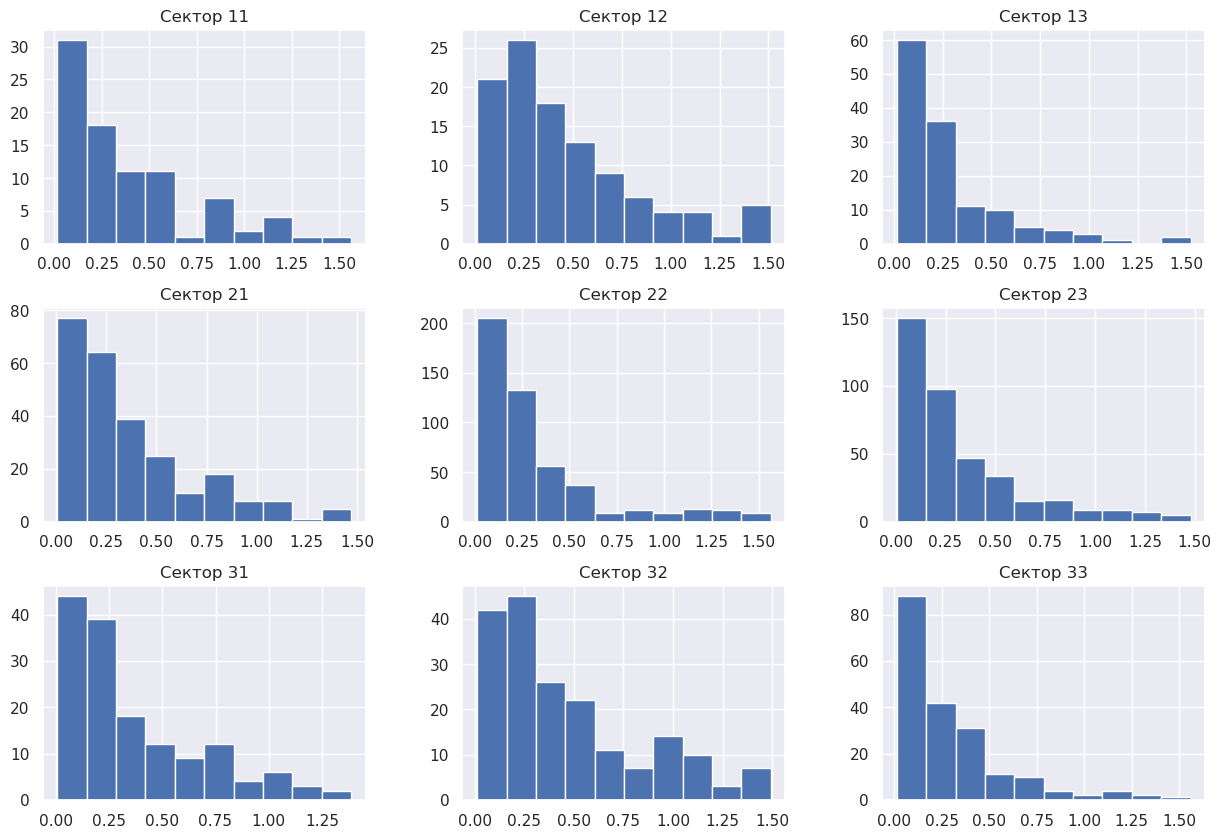

In [64]:
t.hist(figsize=(15, 10) )

Text(0, 0.5, 'Уголовое смещение, радианы')

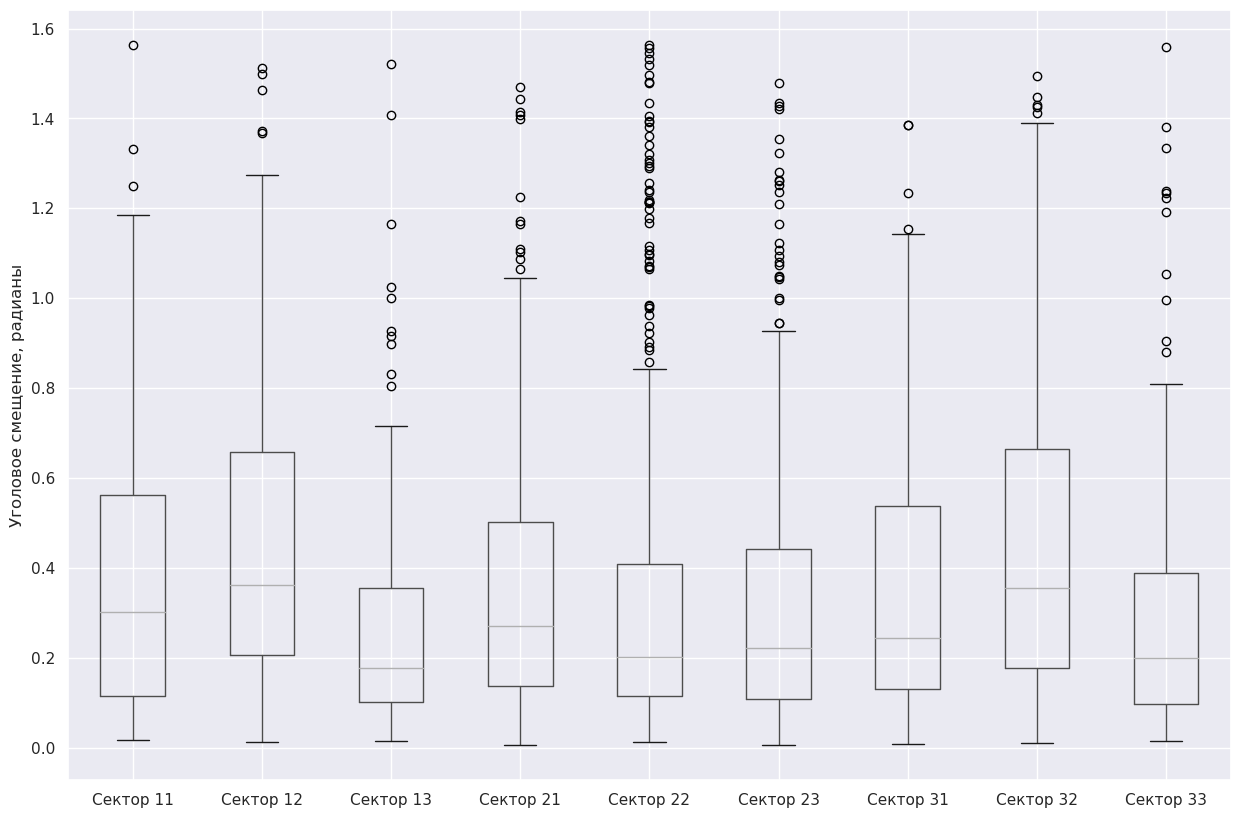

In [66]:
t.boxplot(figsize=(15, 10))
plt.ylabel("Уголовое смещение, радианы")

In [63]:
t = pd.concat([pd.DataFrame(set(t_1) & set(p_1), columns=["Сектор 11"]),
                 pd.DataFrame(set(t_1) & set(p_2), columns=["Сектор 12"]),
                 pd.DataFrame(set(t_1) & set(p_3), columns=["Сектор 13"]),
                 pd.DataFrame(set(t_2) & set(p_1), columns=["Сектор 21"]),
                 pd.DataFrame(set(t_2) & set(p_2), columns=["Сектор 22"]),
                 pd.DataFrame(set(t_2) & set(p_3), columns=["Сектор 23"]),
                 pd.DataFrame(set(t_3) & set(p_1), columns=["Сектор 31"]),
                 pd.DataFrame(set(t_3) & set(p_2), columns=["Сектор 32"]),
                 pd.DataFrame(set(t_3) & set(p_3), columns=["Сектор 33"])], axis=1)

In [42]:
pd.DataFrame(set(t_1) & set(p_1)).describe()

,0
count,84.000000
mean,0.393339
std,0.394979
min,0.021362
25%,0.111905
50%,0.220475
75%,0.557844
max,1.546974


In [59]:
delta = pd.DataFrame(delta, columns=["Относительное смещение"])

In [60]:
delta

,Относительное смещение
0,0.080193
1,0.196687
2,0.077287
3,0.137385
4,0.456166
...,...
1992,0.098445
1993,1.213260
1994,0.141216
1995,1.372852


In [61]:
sb.displot(x=delta["Относительное смещение, радианы"], kind="hist")
plt.ylabel("Плотность распределения")

KeyError: 'Относительное смещение, радианы'

In [419]:
delta.std()

Относительное смещение, радианы    0.339586
dtype: float32

In [420]:
delta.mean()

Относительное смещение, радианы    0.356406
dtype: float32

Text(0, 0.5, 'Угловое смещение, радианы')

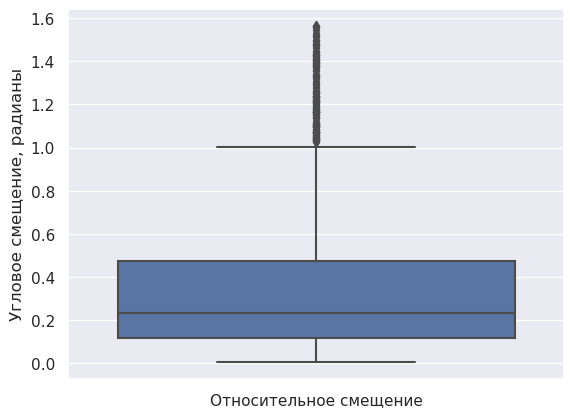

In [62]:
sb.boxplot(delta)
plt.ylabel("Угловое смещение, радианы")

In [422]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [423]:
shapiro(delta)

ShapiroResult(statistic=0.8173697590827942, pvalue=7.034518290910582e-43)

In [424]:
normaltest(delta)

NormaltestResult(statistic=array([502.5874], dtype=float32), pvalue=array([7.32035671e-110]))

In [425]:
0.4/np.pi * 360

45.83662361046586

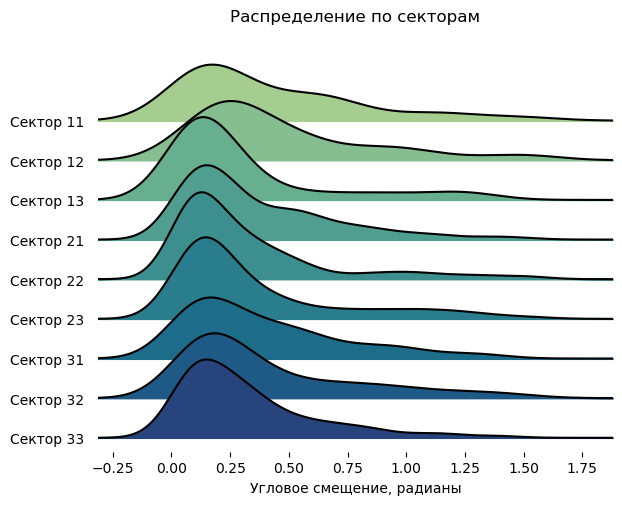

In [442]:
from joypy import joyplot

joyplot(t, colormap=sb.color_palette("crest", as_cmap=True));
plt.xlabel('Угловое смещение, радианы');
plt.title("Распределение по секторам");

Text(0, 0.5, 'Угловое смещение, радианы')

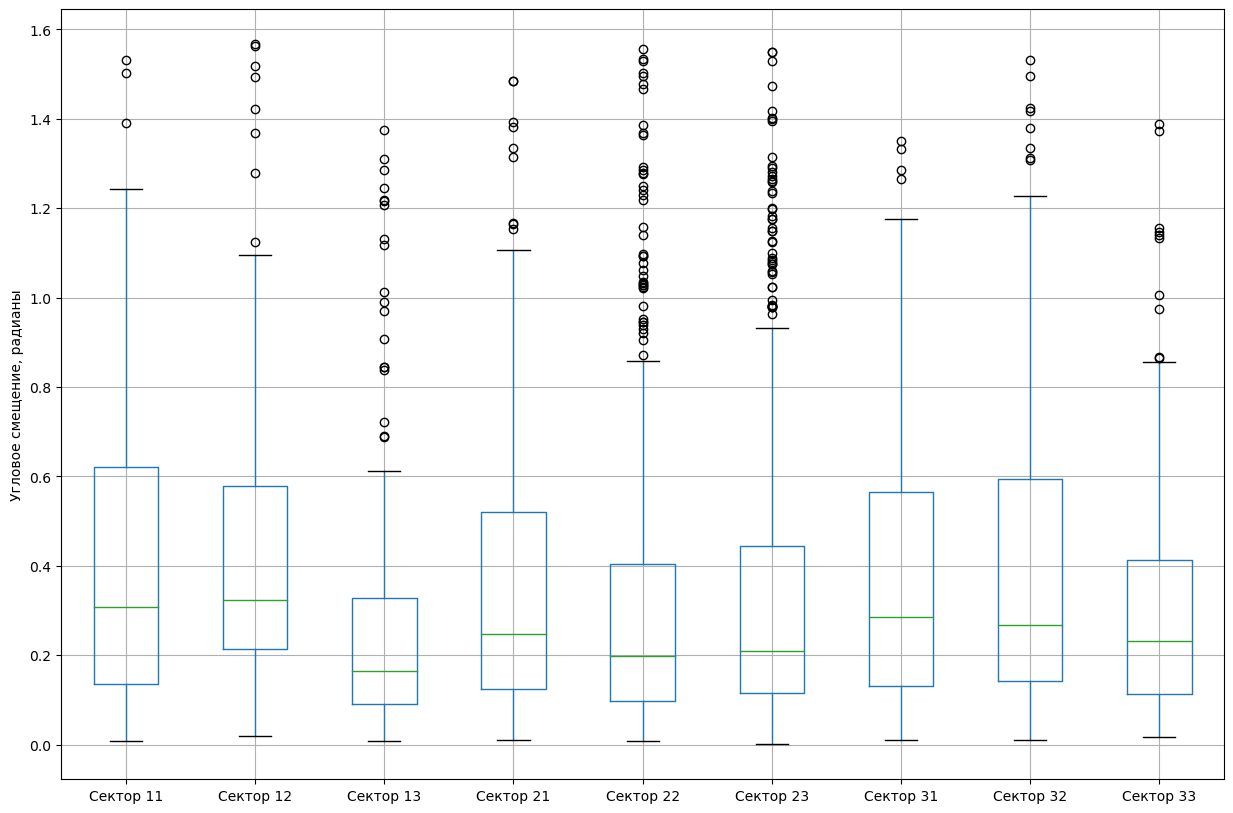

In [455]:
sb.color_palette(palette='colorblind')
t.boxplot(figsize=(15, 10))
plt.ylabel("Угловое смещение, радианы")